In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#using Reliance industries stock
df=pd.read_csv(r"C:\Users\nvnav\Downloads\Quote-Equity-RELIANCE-EQ-18-01-2023-to-18-07-2023.csv")
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-Jul-2023,EQ,"2,817.00","2,837.45","2,793.00","2,796.70","2,822.60","2,820.45","2,814.75","2,837.45","2,180.00","11,937,761","33,601,845,465.45","332,862"
1,17-Jul-2023,EQ,"2,747.00","2,815.05","2,728.00","2,740.70","2,795.20","2,796.70","2,780.30","2,815.05","2,180.00","10,254,545","28,510,731,060.60","386,729"
2,14-Jul-2023,EQ,"2,750.00","2,760.90","2,725.10","2,743.00","2,751.00","2,740.70","2,739.02","2,802.00","2,180.00","6,979,790","19,117,813,181.40","201,319"
3,13-Jul-2023,EQ,"2,783.90","2,799.00","2,737.25","2,767.75","2,748.00","2,743.00","2,774.19","2,802.00","2,180.00","6,776,172","18,798,357,651.30","254,196"
4,12-Jul-2023,EQ,"2,766.30","2,802.00","2,761.65","2,764.70","2,765.00","2,767.75","2,781.60","2,802.00","2,180.00","8,645,662","24,048,764,830.55","348,082"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,24-Jan-2023,EQ,"2,440.00","2,443.65","2,387.35","2,430.30","2,413.00","2,415.95","2,414.29","2,856.15","2,180.00","7,609,558","18,371,644,661.35","232,964"
118,23-Jan-2023,EQ,"2,449.00","2,466.20","2,425.00","2,442.65","2,428.00","2,430.30","2,440.34","2,856.15","2,180.00","5,055,324","12,336,710,126.65","218,454"
119,20-Jan-2023,EQ,"2,475.00","2,475.00","2,437.25","2,472.05","2,443.00","2,442.65","2,452.37","2,856.15","2,180.00","6,890,325","16,897,629,055.85","229,958"
120,19-Jan-2023,EQ,"2,472.90","2,481.15","2,456.65","2,474.70","2,469.00","2,472.05","2,472.43","2,856.15","2,180.00","5,510,333","13,623,898,939.80","153,940"


In [3]:
y_test=df.iloc[32:13:-1,7].apply(lambda x: float(x.replace(',', '')))
#closing price for June 

In [4]:
#dates
x_date=df.iloc[32:13:-1,0]

In [5]:
x_traino=df.iloc[33:96,2].apply(lambda x: float(x.replace(',', '')))
x_trainh=df.iloc[33:96,3].apply(lambda x: float(x.replace(',', '')))
x_trainl=df.iloc[33:96,4].apply(lambda x: float(x.replace(',', '')))
x_train=pd.DataFrame({"o":x_traino,"h":x_trainh,"l":x_trainl})

x_testo=df.iloc[32:13:-1,2].apply(lambda x: float(x.replace(',', '')))
x_testh=df.iloc[32:13:-1,3].apply(lambda x: float(x.replace(',', '')))
x_testl=df.iloc[32:13:-1,4].apply(lambda x: float(x.replace(',', '')))
x_test=pd.DataFrame({"o":x_testo,"h":x_testh,"l":x_testl})

#using open, low and high as the parameters

In [6]:
y_train=df.iloc[33:96,7].apply(lambda x: float(x.replace(',', '')))

In [7]:
from sklearn import linear_model
import numpy as np
var=linear_model.LinearRegression()
var.fit(x_train,np.array(y_train).reshape(-1,1))
y_pred=var.predict(x_test)
y_pred

array([[2466.00207468],
       [2464.32317244],
       [2474.10383412],
       [2469.49884329],
       [2485.9810698 ],
       [2502.59710252],
       [2484.06993344],
       [2478.57588547],
       [2510.8080723 ],
       [2545.01223778],
       [2546.70438098],
       [2578.22185632],
       [2548.20129061],
       [2550.20378764],
       [2559.90458941],
       [2549.13507781],
       [2518.68431959],
       [2498.78729923],
       [2499.35930096]])

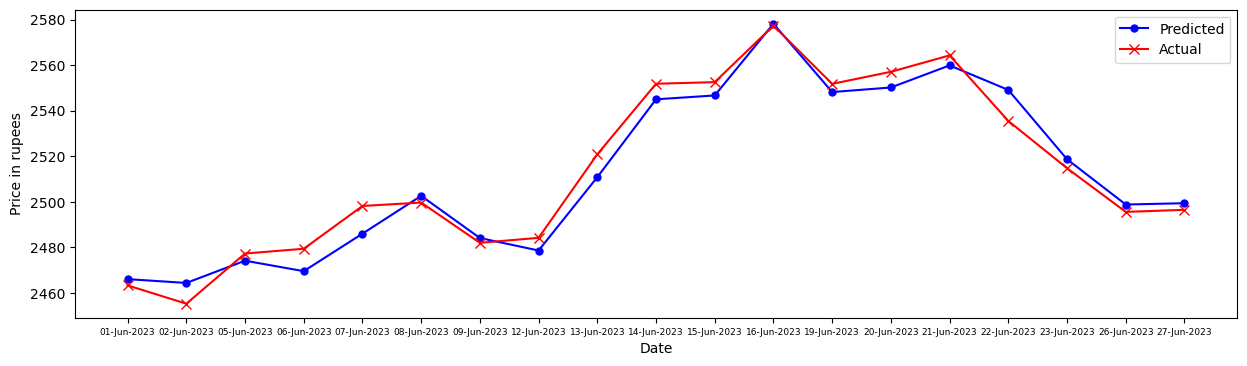

In [8]:
plt.figure(figsize=(15,4))
plt.plot(x_date,y_pred,marker="o",c="blue",ms="5");
plt.plot(x_date,y_test,marker="x",c="red",ms="7");
plt.legend(["Predicted","Actual"]);
plt.xlabel("Date")
plt.ylabel("Price in rupees")
plt.xticks(fontsize=6.5);

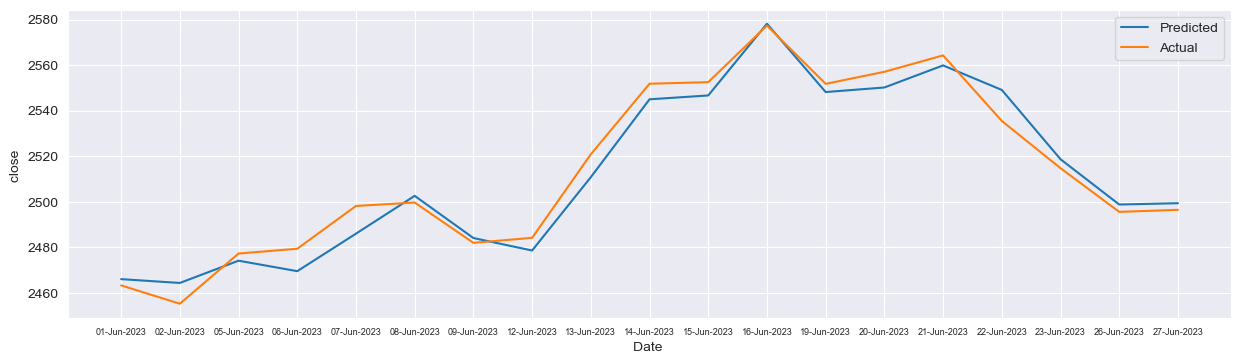

In [16]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(15,4))
sns.lineplot(x=x_date,y=y_pred.flatten(),label="Predicted");
sns.lineplot(x=x_date,y=y_test,label="Actual");
plt.xticks(fontsize=6.5);

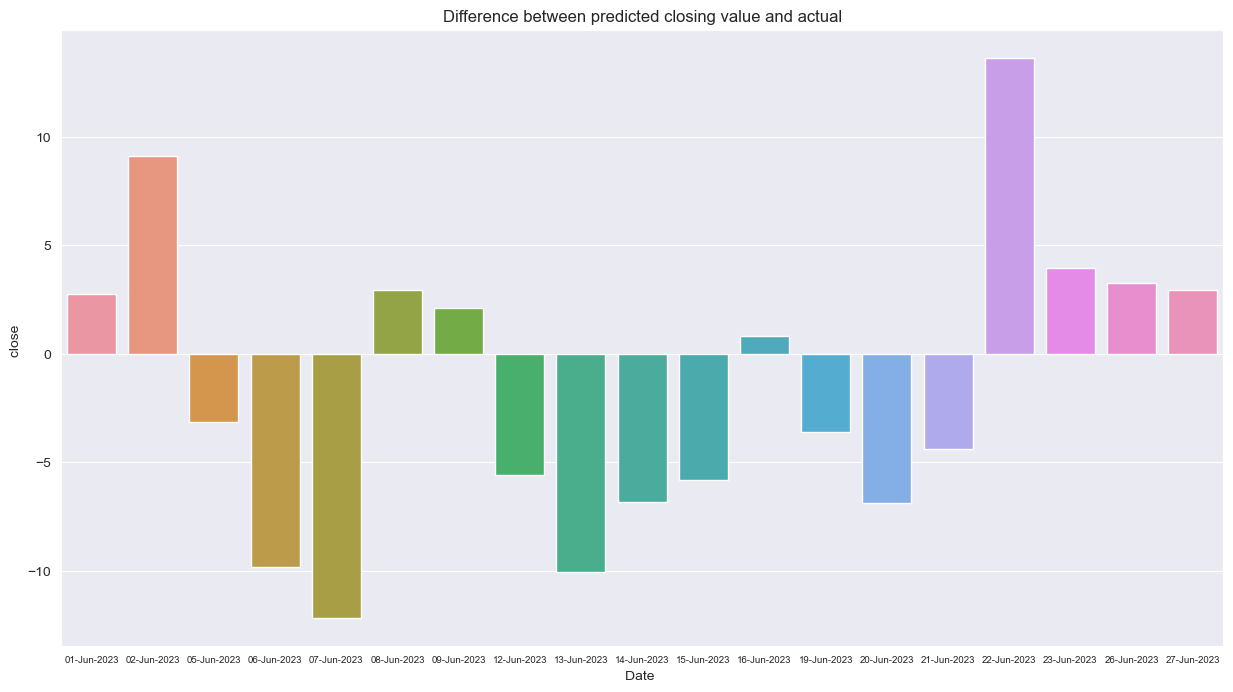

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x=x_date, y=(y_pred.flatten()-y_test));
plt.xticks(fontsize=7);
plt.title("Difference between predicted closing value and actual");